In [2]:
% matplotlib inline


In [3]:
# Download train.csv from https://www.kaggle.com/c/boston-housing/


In [4]:
import pandas as pd

from os.path import expanduser

SRC_PATH = expanduser("~") + '/SageMaker/mastering-ml-on-aws/chapter3/'


In [5]:
housing_df = pd.read_csv(SRC_PATH + 'train.csv')
housing_df.head()


In [7]:
from sklearn.model_selection import train_test_split

training_df, test_df = train_test_split(housing_df, test_size=0.2)
training_df.head()


In [12]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
training_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']
model = regression.fit(training_df[training_features], training_df['medv'])


In [16]:
test_df['predicted_medv'] = model.predict(test_df[training_features])
test_df.head()


/Users/mgurmendez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


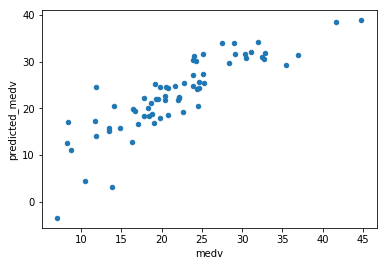

In [18]:
test_df[['medv', 'predicted_medv']].plot(kind='scatter', x='medv', y='predicted_medv')


In [19]:
model.coef_


array([-7.15121101e-02,  3.78566895e-02, -4.47104045e-02,  5.06817970e+00,
       -1.44690998e+01,  3.98249374e+00, -5.88738235e-03, -1.73656446e+00,
        1.01325463e-03, -6.18943939e-01, -6.55278930e-01])

In [20]:
model.intercept_


32.20241453470953

In [22]:
from sklearn.metrics import r2_score

r2_score(test_df['medv'], test_df['predicted_medv'])


0.6950510061982913